In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.shape

(1067, 13)

In [6]:
# chossing input feature(here ENGINESIZE) and output feature(here CO2EMISSION)

X = df[['ENGINESIZE']]
y= df['CO2EMISSIONS']

In [7]:
X

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [8]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

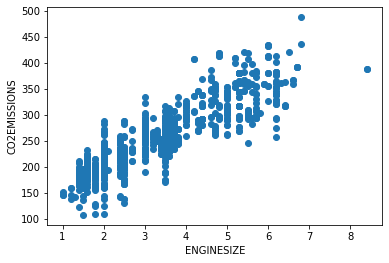

In [9]:
# Engine size vs CO2 emission scatter-plot

plt.scatter(X, y)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [10]:
# train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [11]:
X_train

,ENGINESIZE
160,2.0
646,5.0
205,3.6
982,2.7
1007,5.7
...,...
360,2.0
466,2.4
299,5.7
493,2.4


In [12]:
X_test

,ENGINESIZE
455,5.3
954,2.5
738,5.5
913,3.0
702,1.5
...,...
579,2.4
179,6.2
134,4.4
1,2.4


# Modelling

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
print("Coefficient = ", model.coef_)        # slope
print("Intercept = ", model.intercept_)     # x-intercept

Coefficient =  [39.38078634]
Intercept =  124.98179196839061


In [16]:
y_pred = model.predict(X_test)

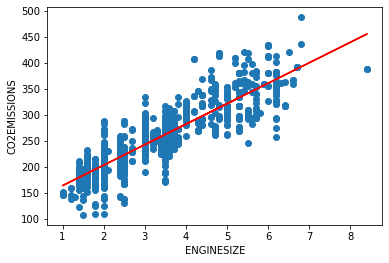

In [17]:
# Plotting regression line

plt.scatter(X, y)
plt.plot(X_test,y_pred, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [18]:
# Checking accuracy of model

from sklearn.metrics import r2_score

r2_score(y_pred,y_test)

0.7317508476671437